## Foundations of Data Science: Inferential Thinking by Resampling

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 5: Hypothesis Testing 

In [48]:
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [49]:
M = 100000 
n = M * 0.26
N = 100
k = 8

stats.hypergeom.cdf(k, M, n, N)

4.694999459438175e-06

In [50]:
def jury_rep(num=100, prob=0.26):
    count = 0
    for _ in range(num):
        if np.random.random() < prob:
            count += 1
    return count

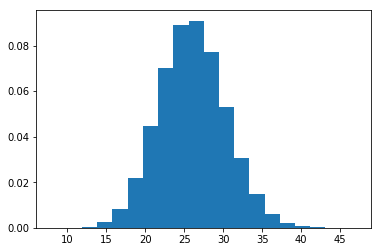

In [72]:
dist = []
for _ in range(100000):
    dist.append(jury_rep())
plt.hist(dist, density=True, bins=20)    
plt.show()


In [76]:
less_than_9 = 0
for _ in range(1000000):
    if jury_rep() < 9:
        less_than_9 += 1

print(less_than_9 / 1000000)

6e-06


#### Mendel

In [ ]:
percent_purple = (100 * sample_proportions(929, model)).item(0)

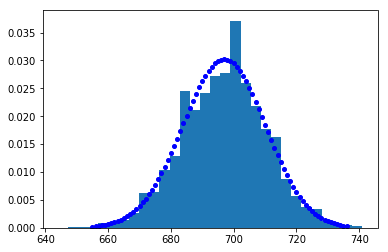

In [148]:
# Simulate pmf
n = 929
p = 0.75
trials = []
for _ in range(10000):
    trials.append(stats.binom.rvs(n, p))

# Plot pmf simulation
fig, ax = plt.subplots(1, 1)
ax.hist(trials, bins=30, density=True)

# Plot pmf
x = np.arange(stats.binom.ppf(0.001, n, p),
              stats.binom.ppf(0.999, n, p))
ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=4)

plt.show()

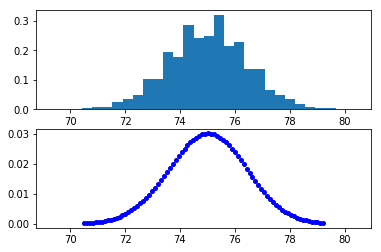

In [222]:
# Simulate pmf
n = 929
p = 0.75
trials = []
for _ in range(10000):
    trials.append(stats.binom.rvs(n, p) / n * 100)

# Plot pmf simulation
fig, ax = plt.subplots(2, 1)
ax[0].hist(trials, bins=30, density=True)

# Plot pmf
x = np.arange(stats.binom.ppf(0.001, n, p),
              stats.binom.ppf(0.999, n, p))
ax[1].plot(x / n * 100, stats.binom.pmf(x, n, p), 'bo', ms=4)

ax[1].set_xlim(ax[0].get_xlim())


plt.show()

In [372]:
# Binomial distribution
n = 929
p = 0.75
x = 705
stats.binom.sf((n * p) + np.abs((n * p) - x), n, p) * 2

0.5096358795048261

In [439]:
# Normal Approximation of proportion
h = 0.75
n = 929
x = 705
p = x / n

sigma = np.sqrt(h * (1 - h) / n)
z_score = np.abs(p - h) / sigma

pval = 2 * stats.norm.sf(z_score)
pval

0.5319092473839093

#### Coin

In [484]:
# Simulated data
fair_data = [np.random.choice(['H', 'T']) for _ in range(1000)]
tailbias_data = [np.random.choice(['H', 'T'], p=[0.45, 0.55]) for _ in range(1000)] 

In [485]:
# H0 = Coin is fair
# H1 = The coin is not fair (two-tailed distribution)
h = 0.50
x = sum([toss=='T' for toss in fair_data])
n = len(fair_data)
p = x / n

sigma = np.sqrt(h * (1 - h) / n)
z_score = np.abs(p - h) / sigma

print('Tails in sample = {0}'.format(x))
pval = 2 * stats.norm.sf(z_score)
print('P-value = {0:.2f}'.format(pval))

Tails in sample = 500
P-value = 1.00


In [486]:
# H0 = Coin is not biased towards tails 
# H1 = The coin is biased towards tails (one-tailed distribution)
h = 0.50
x = sum([toss=='T' for toss in fair_data])
n = len(fair_data)
p = x / n

sigma = np.sqrt(h * (1 - h) / n)
z_score = (p - h) / sigma

print('Tails in sample = {0}'.format(x))
pval = stats.norm.sf(z_score)
print('P-value = {0:.2f}'.format(pval))

Tails in sample = 500
P-value = 0.50


In [487]:
# H0 = Coin is fair
# H1 = The coin is not fair (two-tailed distribution)
h = 0.50
x = sum([toss=='T' for toss in tailbias_data])
n = len(tailbias_data)
p = x / n

sigma = np.sqrt(h * (1 - h) / n)
z_score = np.abs(p - h) / sigma

print('Tails in sample = {0}'.format(x))
pval = 2 * stats.norm.sf(z_score)
print('P-value = {0:.2f}'.format(pval))

Tails in sample = 556
P-value = 0.00


In [488]:
h = 0.50
x = sum([toss=='T' for toss in tailbias_data])
n = len(tailbias_data)
p = x / n

sigma = np.sqrt(h * (1 - h) / n)
z_score = (p - h) / sigma

print('Tails in sample = {0}'.format(x))
pval = stats.norm.sf(z_score)
print('P-value = {0:.2f}'.format(pval))

Tails in sample = 556
P-value = 0.00
